# **Final Bootcamp Project: Show Us What You've Learned!**

---

### **Objective**
This final project is your capstone challenge, designed to give you an opportunity to showcase everything you’ve learned throughout the "100 Next-Gen AI Bootcamp". Your task is to conceive, design, and build a functional AI-powered application that demonstrates your comprehensive understanding of the modern AI engineering lifecycle.

**The Assignment: Identify a Problem, Build the Solution**

Your core task is to:
1.  **Identify a meaningful problem or workflow** that can be significantly improved or automated using the AI techniques covered in this bootcamp.
2.  **Design and architect a solution** that leverages the most appropriate tools and concepts for your chosen problem.
3.  **Implement a working prototype** of your solution.

You have complete freedom to choose your domain and use case. The goal is to showcase your ability to think critically like an AI Engineer, make reasoned technical decisions, and deliver a valuable AI application.

---

### **Core Requirements & Expected Components**

Your final submission **must** incorporate and demonstrate your proficiency in the following areas, regardless of the use case you choose:

1.  **LLM Integration (Core Engine):**
    *   Your solution must be built around a Large Language Model.
    *   There is no restriction on the model provider or the model type — you may choose any LLM that suits your usecase.

2.  **Application of a Core AI Pattern:**
    *   Your project must clearly implement at least one of the major architectural patterns we studied:
        *   **Advanced RAG System:** For solutions that require grounding in external knowledge (e.g., querying documents, websites, or APIs). Your implementation must include at least one advanced technique (Reranking, Query Rewriting, Hybrid Search, etc.).
        *   **Agentic AI System:** For solutions that require autonomous decision-making and action. Your agent must have a clear goal, a reasoning loop (e.g., ReAct), and use at least two custom-defined tools.
        *   **Hybrid ML + GenAI System:** For solutions that combine traditional data analysis with generative capabilities (e.g., using clustering to find insights and an LLM to interpret and summarize them).
    * The more key concepts and techniques you successfully demonstrate in your assignment submission, the higher your project is likely to be scored.

3.  **Clear Problem-Solution Articulation:**
    * Your documentation must clearly define the problem you chose and justify why your AI solution is an effective approach.

---

### **Deliverables**

1.  **Source Code:** A well-organized and commented Jupyter Notebook (`.ipynb`) or a collection of well-commented Python scripts (`.py`) containing all the code for your project.
2.  **Comprehensive `README.md` File:** This is a critical component of your submission. It must include:
    *   **Problem Statement:** A clear and concise description of the problem you chose to solve.
    *   **Solution Overview:** A high-level explanation of your AI application and how it addresses the problem.
    *   **Architecture & Design Rationale:** A detailed section explaining the technical choices you made and *why*.
        *   *Example Justifications: "I chose an Agentic AI pattern because my problem required sequential tool use...", "I implemented a reranker in my RAG pipeline to improve precision with noisy legal documents...", "My chunking strategy was X because..."*
    *   **Setup and Usage Instructions:** Clear steps on how to set up the environment (including API keys) and run your prototype.
3.  **Video Demonstration:** A short screen recording (maximum 3 minutes) where you:
    *   Briefly present your problem statement.
    *   Provide a live demo of your working application.

---

### **Evaluation Criteria**

Your project will be graded out of 100 points, contributing **45%** to your final bootcamp grade.
*   **Problem-Solution Fit & Conception (20%):** How well did you identify a suitable problem and design an effective AI solution for it?
*   **Technical Execution & Application of Concepts (50%):** Does the prototype work as described? How effectively did you implement the core AI patterns (RAG, Agents) and advanced techniques?
*   **Code Quality & Documentation (15%):** Is your code clean, modular, and well-commented? Is your `README.md` thorough, clear, and insightful, especially in its rationale for design choices?
*   **Presentation & Demo (15%):** How effectively do you communicate the purpose and functionality of your project in your video?

---

### **Submission Instructions**

1.  **Deadline:** You have until **November 14** to submit all the deliverables for your project. Any submissions after this date will not be considered.
2.  **Platform:** All submissions must be made to your allocated private GitLab repository. You **must** submit your work in a branch named `final_project`.
3.  **Format:** You can submit your work as either a Jupyter Notebook (`.ipynb`) or a collection of Python scripts (`.py`).
4.  After pushing, you should verify that your branch and files are visible on the GitLab web interface. No further action is needed. The trainers will review all submissions on the `final_project` branch after the deadline. Any assignments submitted after the deadline won't be reviewed and will reflect in your course score.
5. The use of LLMs is encouraged, but ensure that you’re not copying solutions blindly. Always review, test, and understand any code generated, adapting it to the specific requirements of your assignment. Your submission should demonstrate your own comprehension, problem-solving process, and coding style, not just an unedited output from an AI tool.

# **Multi-Agent Business Intelligence System**

## **Project Overview**

### **Problem Statement**
Business executives struggle to make informed strategic decisions because critical business data is siloed across departments (Finance and Sales). Manual analysis of multiple data sources is time-consuming, error-prone, and often provides incomplete insights. Executives need a unified AI system that can analyze data from multiple departments and provide synthesized, actionable business insights.

### **Solution Overview**
A **Multi-Agent Business Intelligence System** that uses specialized AI agents to analyze different data domains and a central orchestrator agent to synthesize insights for executive decision-making.

**Architecture Pattern**: **Agentic AI System** with hierarchical agent coordination and specialized tools.

### **Why This Solution?**
- **Agentic AI Pattern**: Perfect for this problem because it requires sequential tool use, domain-specific analysis, and coordinated decision-making
- **Specialized Agents**: Each agent has deep expertise in its domain (Finance vs Sales)  
- **ReAct Reasoning**: Agents use thought-action-observation loops for transparent decision-making
- **Real Business Value**: Addresses actual executive decision support challenges

---

## **Part 1: Installation and Setup**


In [4]:
!pip install -q groq pandas numpy matplotlib seaborn plotly python-dateutil

print("✅ Installation complete!")

✅ Installation complete!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import json
from groq import Groq
from google.colab import userdata

class GroqClient:
    def __init__(self, api_key, model="meta-llama/llama-4-maverick-17b-128e-instruct"):
        self.client = Groq(api_key=api_key)
        self.model = model

    def check_model_exists(self):
        """Check if the current model is available"""
        try:
            response = self.client.chat.completions.create(
                model=self.model,
                messages=[{"role": "user", "content": "Hello"}],
                max_tokens=1
            )
            return True, f"✅ Model {self.model} is available"
        except Exception as e:
            error_msg = str(e)
            if "decommissioned" in error_msg or "not supported" in error_msg:
                return False, f"❌ Model {self.model} has been decommissioned"
            elif "not found" in error_msg or "invalid" in error_msg:
                return False, f"❌ Model {self.model} not found"
            else:
                return False, f"❌ Error with {self.model}: {error_msg[:100]}"

    def invoke(self, prompt, temperature=0.1, max_tokens=1000):
        response = self.client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature,
            max_tokens=max_tokens
        )
        return response.choices[0].message.content

api_key = userdata.get('GROQ_API_KEY')
if not api_key:
    api_key = input("Enter your Groq API key: ")

llm = GroqClient(api_key)
print("✅ Groq setup complete!")
print(f"✅ Using model: {llm.model}")

✅ Groq setup complete!
✅ Using model: meta-llama/llama-4-maverick-17b-128e-instruct


## **Part 2: Business Data Generation**

We'll generate realistic business data to simulate a company's finance and sales operations. This data will be used by our specialized agents for analysis.

In [6]:
def generate_finance_data():
    """Generate realistic finance data"""
    np.random.seed(42)

    # Expense data
    categories = ['Software', 'Marketing', 'Travel', 'Office', 'Equipment', 'Consulting', 'Utilities']
    departments = ['IT', 'Marketing', 'Sales', 'Admin', 'HR', 'Operations']

    expense_data = []
    for i in range(200):
        date = datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 300))
        category = np.random.choice(categories)
        department = np.random.choice(departments)

        amount_ranges = {
            'Software': (1000, 25000),
            'Marketing': (500, 15000),
            'Travel': (200, 5000),
            'Office': (100, 2000),
            'Equipment': (500, 10000),
            'Consulting': (2000, 20000),
            'Utilities': (300, 3000)
        }

        amount = np.random.randint(*amount_ranges[category])

        expense_data.append({
            'date': date.strftime('%Y-%m-%d'),
            'category': category,
            'amount': amount,
            'department': department,
            'vendor': f"Vendor_{np.random.randint(1, 20)}",
            'description': f"{category} expense for {department}"
        })

    # Budget data
    budget_data = [
        {'department': 'Marketing', 'category': 'Marketing', 'monthly_budget': 50000, 'ytd_actual': 145000, 'variance': -8},
        {'department': 'IT', 'category': 'Software', 'monthly_budget': 25000, 'ytd_actual': 280000, 'variance': 12},
        {'department': 'Sales', 'category': 'Travel', 'monthly_budget': 15000, 'ytd_actual': 165000, 'variance': 20},
        {'department': 'Admin', 'category': 'Office', 'monthly_budget': 5000, 'ytd_actual': 48000, 'variance': -3},
        {'department': 'Operations', 'category': 'Equipment', 'monthly_budget': 20000, 'ytd_actual': 195000, 'variance': 5}
    ]

    return pd.DataFrame(expense_data), pd.DataFrame(budget_data)

def generate_sales_data():
    """Generate realistic sales data"""
    np.random.seed(42)

    # Sales data
    products = ['Enterprise Plan', 'Pro Plan', 'Basic Plan', 'Consulting', 'Support']
    reps = ['John Smith', 'Jane Doe', 'Mike Johnson', 'Sarah Wilson', 'Tom Brown']
    regions = ['North', 'South', 'East', 'West', 'Central']

    sales_data = []
    for i in range(150):
        date = datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 300))
        product = np.random.choice(products)

        revenue_ranges = {
            'Enterprise Plan': (10000, 50000),
            'Pro Plan': (3000, 15000),
            'Basic Plan': (500, 3000),
            'Consulting': (5000, 25000),
            'Support': (1000, 5000)
        }

        revenue = np.random.randint(*revenue_ranges[product])

        sales_data.append({
            'date': date.strftime('%Y-%m-%d'),
            'customer_id': f"C{i+1:03d}",
            'product': product,
            'revenue': revenue,
            'sales_rep': np.random.choice(reps),
            'region': np.random.choice(regions)
        })

    industries = ['Technology', 'Healthcare', 'Finance', 'Retail', 'Manufacturing']
    customer_data = []
    for i in range(100):
        signup_date = datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 600))
        ltv = np.random.randint(5000, 100000)
        churn_risk = np.random.choice(['Low', 'Medium', 'High'], p=[0.6, 0.3, 0.1])

        customer_data.append({
            'customer_id': f"C{i+1:03d}",
            'company': f"Company_{i+1}",
            'industry': np.random.choice(industries),
            'signup_date': signup_date.strftime('%Y-%m-%d'),
            'ltv': ltv,
            'churn_risk': churn_risk
        })

    return pd.DataFrame(sales_data), pd.DataFrame(customer_data)

expense_df, budget_df = generate_finance_data()
sales_df, customer_df = generate_sales_data()

print("✅ Business data generated successfully!")
print(f"📊 Expense records: {len(expense_df)}")
print(f"📊 Sales records: {len(sales_df)}")
print(f"📊 Customer records: {len(customer_df)}")


print("\n📋 Sample Expense Data:")
print(expense_df.head())
print("\n📋 Sample Sales Data:")
print(sales_df.head())

✅ Business data generated successfully!
📊 Expense records: 200
📊 Sales records: 150
📊 Customer records: 100

📋 Sample Expense Data:
         date   category  amount  department     vendor  \
0  2024-04-12     Office    1394          HR  Vendor_11   
1  2024-03-12  Equipment    6234          HR  Vendor_19   
2  2024-08-02     Travel    3644       Sales   Vendor_4   
3  2024-05-31     Travel     969  Operations  Vendor_12   
4  2024-10-20  Marketing    6920       Admin   Vendor_1   

                     description  
0          Office expense for HR  
1       Equipment expense for HR  
2       Travel expense for Sales  
3  Travel expense for Operations  
4    Marketing expense for Admin  

📋 Sample Sales Data:
         date customer_id     product  revenue     sales_rep   region
0  2024-04-12        C001  Consulting     5860  Mike Johnson  Central
1  2024-01-21        C002    Pro Plan     3466  Mike Johnson     East
2  2024-03-28        C003     Support     4171  Mike Johnson  Central
3

## **Part 3: Specialized Agent Tools**

Each agent has domain-specific tools that implement the core business logic. These tools are designed to be modular and reusable.


In [7]:
class ExpenseAnalyzer:
    """Tool for analyzing expense patterns and trends"""

    def __init__(self):
        self.name = "expense_analyzer"
        self.description = "Analyze expense data for patterns, trends, and insights"

    def run(self, query: str) -> str:
        try:
            query_lower = query.lower()

            if "monthly" in query_lower or "trend" in query_lower:
                expense_df['date'] = pd.to_datetime(expense_df['date'])
                monthly_expenses = expense_df.groupby(expense_df['date'].dt.to_period('M'))['amount'].sum()

                result = f"Monthly Expense Trends:\n"
                for month, amount in monthly_expenses.items():
                    result += f"- {month}: ${amount:,}\n"

                if len(monthly_expenses) > 1:
                    trend = ((monthly_expenses.iloc[-1] - monthly_expenses.iloc[0]) / monthly_expenses.iloc[0]) * 100
                    result += f"\nOverall trend: {trend:+.1f}% change from first to last month"

                return result

            elif "category" in query_lower or "breakdown" in query_lower:
                category_expenses = expense_df.groupby('category')['amount'].sum().sort_values(ascending=False)
                total_expenses = category_expenses.sum()

                result = f"Expense Breakdown by Category:\n"
                for category, amount in category_expenses.items():
                    percentage = (amount / total_expenses) * 100
                    result += f"- {category}: ${amount:,} ({percentage:.1f}%)\n"

                return result

            elif "department" in query_lower:
                dept_expenses = expense_df.groupby('department')['amount'].sum().sort_values(ascending=False)
                total_expenses = dept_expenses.sum()

                result = f"Expense Breakdown by Department:\n"
                for dept, amount in dept_expenses.items():
                    percentage = (amount / total_expenses) * 100
                    result += f"- {dept}: ${amount:,} ({percentage:.1f}%)\n"

                return result

            else:
                total_expenses = expense_df['amount'].sum()
                avg_expense = expense_df['amount'].mean()
                top_category = expense_df.groupby('category')['amount'].sum().idxmax()

                return f"Expense Summary:\n- Total Expenses: ${total_expenses:,}\n- Average Expense: ${avg_expense:,.0f}\n- Top Category: {top_category}"

        except Exception as e:
            return f"Error analyzing expenses: {str(e)}"

class BudgetTracker:
    """Tool for tracking budget performance and variances"""

    def __init__(self):
        self.name = "budget_tracker"
        self.description = "Track budget performance, variances, and provide budget insights"

    def run(self, query: str) -> str:
        try:
            result = "Budget Performance Analysis:\n\n"

            for _, row in budget_df.iterrows():
                department = row['department']
                monthly_budget = row['monthly_budget']
                ytd_actual = row['ytd_actual']
                variance = row['variance']

                status = "OVER BUDGET" if variance > 0 else "UNDER BUDGET" if variance < 0 else "ON BUDGET"

                result += f"📊 {department} Department:\n"
                result += f"   - Monthly Budget: ${monthly_budget:,}\n"
                result += f"   - YTD Actual: ${ytd_actual:,}\n"
                result += f"   - Variance: {variance:+.1f}% ({status})\n\n"

            avg_variance = budget_df['variance'].mean()
            if avg_variance > 10:
                budget_health = "⚠️  ATTENTION NEEDED - Significant budget overruns"
            elif avg_variance > 0:
                budget_health = "⚠️  CAUTION - Some budget overruns"
            else:
                budget_health = "✅ HEALTHY - Budgets on track"

            result += f"Overall Budget Health: {budget_health}\n"
            result += f"Average Variance: {avg_variance:+.1f}%"

            return result

        except Exception as e:
            return f"Error tracking budget: {str(e)}"

print("✅ Finance tools created successfully!")

✅ Finance tools created successfully!


In [8]:
class RevenueAnalyzer:
    """Tool for analyzing revenue trends and patterns"""

    def __init__(self):
        self.name = "revenue_analyzer"
        self.description = "Analyze revenue data for trends, patterns, and growth insights"

    def run(self, query: str) -> str:
        try:
            query_lower = query.lower()

            if "monthly" in query_lower or "trend" in query_lower:
                sales_df['date'] = pd.to_datetime(sales_df['date'])
                monthly_revenue = sales_df.groupby(sales_df['date'].dt.to_period('M'))['revenue'].sum()

                result = f"Monthly Revenue Trends:\n"
                for month, revenue in monthly_revenue.items():
                    result += f"- {month}: ${revenue:,}\n"

                if len(monthly_revenue) > 1:
                    growth_rate = ((monthly_revenue.iloc[-1] - monthly_revenue.iloc[0]) / monthly_revenue.iloc[0]) * 100
                    result += f"\nOverall growth: {growth_rate:+.1f}% from first to last month"

                return result

            elif "product" in query_lower:
                product_revenue = sales_df.groupby('product')['revenue'].agg(['sum', 'count', 'mean']).round(0)
                total_revenue = product_revenue['sum'].sum()

                result = f"Product Performance Analysis:\n"
                for product in product_revenue.index:
                    revenue = product_revenue.loc[product, 'sum']
                    deals = product_revenue.loc[product, 'count']
                    avg_deal = product_revenue.loc[product, 'mean']
                    percentage = (revenue / total_revenue) * 100

                    result += f"- {product}:\n"
                    result += f"  Revenue: ${revenue:,.0f} ({percentage:.1f}%)\n"
                    result += f"  Deals: {deals} | Avg Deal: ${avg_deal:,.0f}\n\n"

                return result

            elif "region" in query_lower:
                region_revenue = sales_df.groupby('region')['revenue'].sum().sort_values(ascending=False)
                total_revenue = region_revenue.sum()

                result = f"Regional Performance:\n"
                for region, revenue in region_revenue.items():
                    percentage = (revenue / total_revenue) * 100
                    result += f"- {region}: ${revenue:,} ({percentage:.1f}%)\n"

                return result

            else:
                total_revenue = sales_df['revenue'].sum()
                avg_deal = sales_df['revenue'].mean()
                top_product = sales_df.groupby('product')['revenue'].sum().idxmax()

                return f"Revenue Summary:\n- Total Revenue: ${total_revenue:,}\n- Average Deal Size: ${avg_deal:,.0f}\n- Top Product: {top_product}"

        except Exception as e:
            return f"Error analyzing revenue: {str(e)}"

class CustomerAnalyzer:
    """Tool for analyzing customer metrics and behavior"""

    def __init__(self):
        self.name = "customer_analyzer"
        self.description = "Analyze customer data for segmentation, retention, and lifetime value insights"

    def run(self, query: str) -> str:
        try:
            query_lower = query.lower()

            if "churn" in query_lower or "risk" in query_lower:
                churn_analysis = customer_df['churn_risk'].value_counts()
                total_customers = len(customer_df)

                result = f"Customer Churn Risk Analysis:\n"
                for risk_level, count in churn_analysis.items():
                    percentage = (count / total_customers) * 100
                    result += f"- {risk_level} Risk: {count} customers ({percentage:.1f}%)\n"

                high_risk = customer_df[customer_df['churn_risk'] == 'High']
                if len(high_risk) > 0:
                    avg_ltv = high_risk['ltv'].mean()
                    result += f"\n⚠️ High-risk customers have avg LTV of ${avg_ltv:,.0f}"

                return result

            elif "ltv" in query_lower or "value" in query_lower:
                ltv_stats = customer_df['ltv'].describe()

                result = f"Customer Lifetime Value Analysis:\n"
                result += f"- Average LTV: ${ltv_stats['mean']:,.0f}\n"
                result += f"- Median LTV: ${ltv_stats['50%']:,.0f}\n"
                result += f"- Top 25% LTV: ${ltv_stats['75%']:,.0f}+\n"

                industry_ltv = customer_df.groupby('industry')['ltv'].mean().sort_values(ascending=False)
                result += f"\nLTV by Industry:\n"
                for industry, avg_ltv in industry_ltv.items():
                    result += f"- {industry}: ${avg_ltv:,.0f}\n"

                return result

            elif "industry" in query_lower or "segment" in query_lower:
                industry_breakdown = customer_df['industry'].value_counts()
                total_customers = len(customer_df)

                result = f"Customer Industry Breakdown:\n"
                for industry, count in industry_breakdown.items():
                    percentage = (count / total_customers) * 100
                    avg_ltv = customer_df[customer_df['industry'] == industry]['ltv'].mean()
                    result += f"- {industry}: {count} customers ({percentage:.1f}%) | Avg LTV: ${avg_ltv:,.0f}\n"

                return result

            else:
                total_customers = len(customer_df)
                avg_ltv = customer_df['ltv'].mean()
                top_industry = customer_df['industry'].value_counts().index[0]
                high_risk_pct = (len(customer_df[customer_df['churn_risk'] == 'High']) / total_customers) * 100

                return f"Customer Summary:\n- Total Customers: {total_customers}\n- Average LTV: ${avg_ltv:,.0f}\n- Top Industry: {top_industry}\n- High Churn Risk: {high_risk_pct:.1f}%"

        except Exception as e:
            return f"Error analyzing customers: {str(e)}"

print("✅ Sales tools created successfully!")

✅ Sales tools created successfully!


## **Part 4: Specialized Agents (ReAct Pattern)**

Each specialized agent implements the **ReAct (Reasoning + Acting) pattern** with:
- **Thought**: Agent reasoning about what to do
- **Action**: Using appropriate tools
- **Observation**: Processing tool results
- **Final Answer**: Synthesized insights


In [10]:
class FinanceAgent:
    """Specialized agent for financial data analysis with ReAct reasoning"""

    def __init__(self, llm_client):
        self.llm = llm_client
        self.tools = {
            "expense_analyzer": ExpenseAnalyzer(),
            "budget_tracker": BudgetTracker()
        }

    def analyze(self, query: str) -> str:
        """Analyze financial query using ReAct pattern"""
        try:
            #ReAct prompt
            react_prompt = f"""You are a Finance Agent specialized in analyzing financial data and providing cost optimization insights.

Available tools:
- expense_analyzer: Analyze expense data for patterns, trends, and insights
- budget_tracker: Track budget performance, variances, and provide budget insights

Use this ReAct format:
Question: {query}
Thought: [Analyze what type of financial analysis is needed]
Action: [Choose expense_analyzer OR budget_tracker]
Action Input: [The query to send to the tool]
Observation: [Tool results will be provided]
Thought: [Analyze the results and determine if more analysis is needed]
Final Answer: [Comprehensive financial insights and recommendations]

Begin your analysis:"""

            reasoning = self.llm.invoke(react_prompt, temperature=0.1, max_tokens=500)

            tool_results = {}

            if "expense_analyzer" in reasoning.lower():
                expense_result = self.tools["expense_analyzer"].run(query)
                tool_results["expense_analyzer"] = expense_result

            if "budget_tracker" in reasoning.lower():
                budget_result = self.tools["budget_tracker"].run(query)
                tool_results["budget_tracker"] = budget_result

            final_prompt = f"""Based on the financial query: "{query}"

Tool Results:
{json.dumps(tool_results, indent=2)}

Provide a brief financial analysis with:
1. Key findings from the data
2. Financial implications
3. Cost optimization recommendations
4. Risk assessment

Keep it concise and executive-ready."""

            final_analysis = self.llm.invoke(final_prompt, temperature=0.1, max_tokens=600)
            return final_analysis

        except Exception as e:
            return f"Finance Agent Error: {str(e)}"

class SalesAgent:
    """Specialized agent for sales data analysis with ReAct reasoning"""

    def __init__(self, llm_client):
        self.llm = llm_client
        self.tools = {
            "revenue_analyzer": RevenueAnalyzer(),
            "customer_analyzer": CustomerAnalyzer()
        }

    def analyze(self, query: str) -> str:
        """Analyze sales query using ReAct pattern"""
        try:
            #ReAct prompt
            react_prompt = f"""You are a Sales Agent specialized in analyzing sales and customer data to provide growth insights.

Available tools:
- revenue_analyzer: Analyze revenue data for trends, patterns, and growth insights
- customer_analyzer: Analyze customer data for segmentation, retention, and lifetime value insights

Use this ReAct format:
Question: {query}
Thought: [Analyze what type of sales analysis is needed]
Action: [Choose revenue_analyzer OR customer_analyzer]
Action Input: [The query to send to the tool]
Observation: [Tool results will be provided]
Thought: [Analyze the results and determine if more analysis is needed]
Final Answer: [Comprehensive sales insights and recommendations]

Begin your analysis:"""

            reasoning = self.llm.invoke(react_prompt, temperature=0.1, max_tokens=500)

            tool_results = {}

            if "revenue_analyzer" in reasoning.lower():
                revenue_result = self.tools["revenue_analyzer"].run(query)
                tool_results["revenue_analyzer"] = revenue_result

            if "customer_analyzer" in reasoning.lower():
                customer_result = self.tools["customer_analyzer"].run(query)
                tool_results["customer_analyzer"] = customer_result

            final_prompt = f"""Based on the sales query: "{query}"

Tool Results:
{json.dumps(tool_results, indent=2)}

Provide a brief sales analysis with:
1. Key findings from the data
2. Growth opportunities
3. Customer insights and recommendations
4. Revenue optimization strategies

Keep it concise and executive-ready."""

            final_analysis = self.llm.invoke(final_prompt, temperature=0.1, max_tokens=600)
            return final_analysis

        except Exception as e:
            return f"Sales Agent Error: {str(e)}"

print("✅ Specialized agents created successfully!")

✅ Specialized agents created successfully!


## **Part 5: Central Orchestrator Agent**

The Central Agent coordinates specialized agents and synthesizes cross-domain insights for executive decision-making.

### **Key Capabilities:**
- **Intelligent Query Routing**: Determines which agents to consult
- **Multi-Agent Coordination**: Manages parallel agent execution
- **Insight Synthesis**: Combines insights from multiple domains
- **Executive Reporting**: Generates strategic recommendations


In [12]:
class CentralAgent:
    """Central orchestrator agent that coordinates specialized agents and synthesizes insights"""

    def __init__(self, llm):
        self.llm = llm
        self.finance_agent = FinanceAgent(llm)
        self.sales_agent = SalesAgent(llm)
        self.conversation_history = []

    def route_query(self, query: str) -> dict:
        """Determine which agents should be consulted based on the query"""
        query_lower = query.lower()

        needs_finance = any(keyword in query_lower for keyword in [
            'expense', 'budget', 'cost', 'spending', 'financial', 'profit', 'margin', 'roi'
        ])

        needs_sales = any(keyword in query_lower for keyword in [
            'revenue', 'sales', 'customer', 'growth', 'pipeline', 'conversion', 'retention'
        ])

        if not needs_finance and not needs_sales:
            needs_finance = needs_sales = True

        return {
            'finance': needs_finance,
            'sales': needs_sales,
            'query': query
        }

    def synthesize_insights(self, query: str, finance_insights: str = None, sales_insights: str = None) -> str:
        """Synthesize insights from multiple agents into actionable recommendations"""

        synthesis_prompt = f"""
As an Executive AI Assistant, synthesize the following insights to provide strategic recommendations.

Original Executive Query: "{query}"

Finance Agent Insights:
{finance_insights if finance_insights else "No finance insights requested."}

Sales Agent Insights:
{sales_insights if sales_insights else "No sales insights requested."}

Provide a comprehensive executive summary with:
1. Key findings from the data
2. Strategic implications
3. Specific actionable recommendations
4. Potential risks or considerations

Format your response as an executive briefing with clear sections and bullet points.
"""

        try:
            response = self.llm.invoke(synthesis_prompt)
            return response
        except Exception as e:
            return f"Synthesis Error: {str(e)}"

    def process_executive_query(self, query: str) -> dict:
        """Main method to process executive queries through the multi-agent system"""
        print(f"🔍 Processing executive query: {query}\n")

        routing = self.route_query(query)
        print(f"📊 Query routing: Finance={routing['finance']}, Sales={routing['sales']}\n")

        results = {}

        if routing['finance']:
            print("💰 Consulting Finance Agent...")
            finance_insights = self.finance_agent.analyze(query)
            results['finance'] = finance_insights
            print("✅ Finance analysis complete\n")

        if routing['sales']:
            print("📈 Consulting Sales Agent...")
            sales_insights = self.sales_agent.analyze(query)
            results['sales'] = sales_insights
            print("✅ Sales analysis complete\n")

        print("🧠 Synthesizing insights...")
        executive_summary = self.synthesize_insights(
            query,
            results.get('finance'),
            results.get('sales')
        )
        results['executive_summary'] = executive_summary
        print("✅ Executive summary generated\n")

        return results

central_agent = CentralAgent(llm)
print("✅ Central orchestrator agent created successfully!")

✅ Central orchestrator agent created successfully!


## **Part 6: System Demonstration**

Let's test our multi-agent system with realistic executive scenarios that demonstrate the full capabilities of our business intelligence platform.

In [13]:
def display_executive_briefing(results: dict, query: str):
    """Display results in a professional executive briefing format"""
    print("="*80)
    print("📋 EXECUTIVE BUSINESS INTELLIGENCE BRIEFING")
    print("="*80)
    print(f"Query: {query}")
    print(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("-"*80)

    if 'finance' in results:
        print("💰 FINANCE AGENT ANALYSIS:")
        print("-"*40)
        print(results['finance'])
        print()

    if 'sales' in results:
        print("📈 SALES AGENT ANALYSIS:")
        print("-"*40)
        print(results['sales'])
        print()

    print("🎯 EXECUTIVE SUMMARY & RECOMMENDATIONS:")
    print("-"*50)
    print(results['executive_summary'])
    print("="*80)

test_scenarios = [
    {
        "scenario": "Budget Planning Decision",
        "query": "Should we increase our marketing budget for Q4? Analyze our current spending patterns and sales performance."
    },
    {
        "scenario": "Quarterly Performance Review",
        "query": "How is our company performing this quarter in terms of revenue growth and cost management?"
    },
    {
        "scenario": "Customer Strategy Planning",
        "query": "What insights do you have about our customer base and revenue by product? Any retention concerns?"
    }
]

print("🚀 TESTING MULTI-AGENT BUSINESS INTELLIGENCE SYSTEM")
print("="*80)

test = test_scenarios[0]
print(f"\n🔬 TEST 1: {test['scenario']}")
print("-"*50)

results = central_agent.process_executive_query(test['query'])

display_executive_briefing(results, test['query'])

print("\n" + "="*80)

🚀 TESTING MULTI-AGENT BUSINESS INTELLIGENCE SYSTEM

🔬 TEST 1: Budget Planning Decision
--------------------------------------------------
🔍 Processing executive query: Should we increase our marketing budget for Q4? Analyze our current spending patterns and sales performance.

📊 Query routing: Finance=True, Sales=True

💰 Consulting Finance Agent...
✅ Finance analysis complete

📈 Consulting Sales Agent...
✅ Sales analysis complete

🧠 Synthesizing insights...
✅ Executive summary generated

📋 EXECUTIVE BUSINESS INTELLIGENCE BRIEFING
Query: Should we increase our marketing budget for Q4? Analyze our current spending patterns and sales performance.
Generated: 2025-11-14 18:02:13
--------------------------------------------------------------------------------
💰 FINANCE AGENT ANALYSIS:
----------------------------------------
**Financial Analysis: Should We Increase Our Marketing Budget for Q4?**

### 1. Key Findings from the Data
- Total expenses are $1,139,873, with an average expense of $5

In [14]:
for i, test in enumerate(test_scenarios[1:], 2):
    print(f"\n🔬 TEST {i}: {test['scenario']}")
    print("-"*50)

    results = central_agent.process_executive_query(test['query'])

    display_executive_briefing(results, test['query'])

    print("\n" + "="*80)


🔬 TEST 2: Quarterly Performance Review
--------------------------------------------------
🔍 Processing executive query: How is our company performing this quarter in terms of revenue growth and cost management?

📊 Query routing: Finance=True, Sales=True

💰 Consulting Finance Agent...
✅ Finance analysis complete

📈 Consulting Sales Agent...
✅ Sales analysis complete

🧠 Synthesizing insights...
✅ Executive summary generated

📋 EXECUTIVE BUSINESS INTELLIGENCE BRIEFING
Query: How is our company performing this quarter in terms of revenue growth and cost management?
Generated: 2025-11-14 18:02:42
--------------------------------------------------------------------------------
💰 FINANCE AGENT ANALYSIS:
----------------------------------------
**Financial Analysis: QTD Performance**

**1. Key Findings:**
- Total Expenses: $1,139,873; Average Expense: $5,699
- Top Expense Category: Software
- IT, Sales, and Operations Departments are over budget (12%, 20%, and 5% variances, respectively)
- Ma

## **Part 7: Interactive Executive Dashboard**

The following cell provides an interactive interface for executives to query the system in real-time.

In [15]:
def executive_dashboard():
    """Interactive dashboard for executives to query the system"""
    print("🎯 EXECUTIVE AI DASHBOARD")
    print("="*60)
    print("Ask any business question and get AI-powered insights!")
    print("\nExample queries:")
    print("• 'Analyze our expense trends and budget performance'")
    print("• 'What's our revenue growth and customer retention?'")
    print("• 'Should I invest more in sales or reduce costs?'")
    print("• 'Show me our top performing products and regions'")
    print("• Type 'quit' to exit")
    print("-"*60)

    while True:
        query = input("\n💼 Executive Query: ").strip()

        if query.lower() in ['quit', 'exit', 'q']:
            print("👋 Thank you for using the Executive AI Dashboard!")
            break

        if not query:
            continue

        try:
            results = central_agent.process_executive_query(query)
            display_executive_briefing(results, query)

        except Exception as e:
            print(f"❌ Error processing query: {str(e)}")

        print("\n" + "-"*60)

print("🎯 INTERACTIVE DASHBOARD DEMO")
print("="*50)
print("Instead of running the full interactive loop, let's demonstrate with a custom query:")

custom_query = "What are our biggest cost centers and how can we optimize spending?"
print(f"\n💼 Sample Executive Query: {custom_query}")
print("-"*60)

custom_results = central_agent.process_executive_query(custom_query)
display_executive_briefing(custom_results, custom_query)
executive_dashboard()

🎯 INTERACTIVE DASHBOARD DEMO
Instead of running the full interactive loop, let's demonstrate with a custom query:

💼 Sample Executive Query: What are our biggest cost centers and how can we optimize spending?
------------------------------------------------------------
🔍 Processing executive query: What are our biggest cost centers and how can we optimize spending?

📊 Query routing: Finance=True, Sales=False

💰 Consulting Finance Agent...
✅ Finance analysis complete

🧠 Synthesizing insights...
✅ Executive summary generated

📋 EXECUTIVE BUSINESS INTELLIGENCE BRIEFING
Query: What are our biggest cost centers and how can we optimize spending?
Generated: 2025-11-14 18:04:20
--------------------------------------------------------------------------------
💰 FINANCE AGENT ANALYSIS:
----------------------------------------
**Financial Analysis: Cost Centers and Optimization Opportunities**

**1. Key Findings:**
- Total expenses amount to $1,139,873, with software being the top expense category

## **Part 8: Business Metrics Visualization**


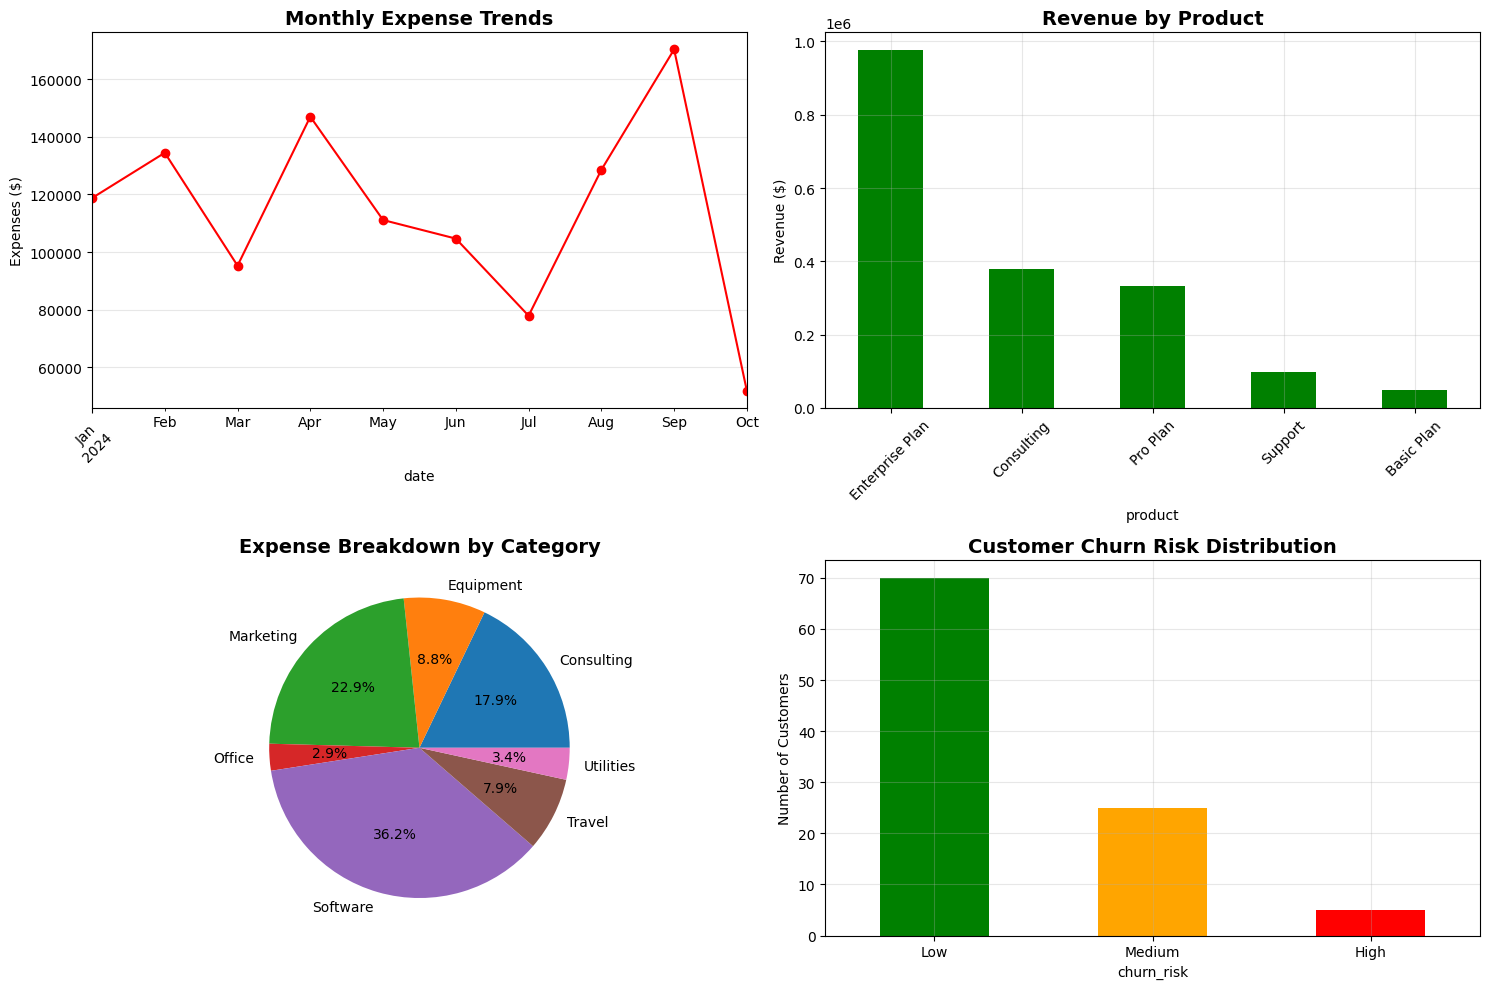

📊 KEY BUSINESS METRICS SUMMARY
💰 Total Expenses: $1,139,873
📈 Total Revenue: $1,833,067
💹 Profit Margin: 37.8%
👥 Total Customers: 100
📉 High Churn Risk: 5 customers (5.0%)
🏆 Top Revenue Product: Enterprise Plan
💸 Top Expense Category: Software


In [16]:
def generate_business_dashboard():
    """Generate visual dashboard of key business metrics"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Monthly expense trends
    expense_df['date'] = pd.to_datetime(expense_df['date'])
    monthly_expenses = expense_df.groupby(expense_df['date'].dt.to_period('M'))['amount'].sum()
    monthly_expenses.plot(kind='line', ax=ax1, marker='o', color='red')
    ax1.set_title('Monthly Expense Trends', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Expenses ($)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)

    # 2. Revenue by product
    product_revenue = sales_df.groupby('product')['revenue'].sum().sort_values(ascending=False)
    product_revenue.plot(kind='bar', ax=ax2, color='green')
    ax2.set_title('Revenue by Product', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Revenue ($)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

    # 3. Expense breakdown by category
    category_expenses = expense_df.groupby('category')['amount'].sum()
    ax3.pie(category_expenses.values, labels=category_expenses.index, autopct='%1.1f%%')
    ax3.set_title('Expense Breakdown by Category', fontsize=14, fontweight='bold')

    # 4. Customer churn risk
    churn_counts = customer_df['churn_risk'].value_counts()
    colors = ['green', 'orange', 'red']
    churn_counts.plot(kind='bar', ax=ax4, color=colors)
    ax4.set_title('Customer Churn Risk Distribution', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Number of Customers')
    ax4.tick_params(axis='x', rotation=0)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print("📊 KEY BUSINESS METRICS SUMMARY")
    print("="*50)

    # Calculate key metrics
    total_expenses = expense_df['amount'].sum()
    total_revenue = sales_df['revenue'].sum()
    profit_margin = ((total_revenue - total_expenses) / total_revenue) * 100 if total_revenue > 0 else 0
    high_churn_customers = len(customer_df[customer_df['churn_risk']=='High'])
    top_product = sales_df.groupby('product')['revenue'].sum().idxmax()
    top_expense_category = expense_df.groupby('category')['amount'].sum().idxmax()

    print(f"💰 Total Expenses: ${total_expenses:,}")
    print(f"📈 Total Revenue: ${total_revenue:,}")
    print(f"💹 Profit Margin: {profit_margin:.1f}%")
    print(f"👥 Total Customers: {len(customer_df)}")
    print(f"📉 High Churn Risk: {high_churn_customers} customers ({(high_churn_customers/len(customer_df)*100):.1f}%)")
    print(f"🏆 Top Revenue Product: {top_product}")
    print(f"💸 Top Expense Category: {top_expense_category}")

# Generate the dashboard
generate_business_dashboard()

## **Part 9: System Performance Evaluation**

Let's evaluate our multi-agent system's performance and capabilities.

In [17]:
def evaluate_system_performance():
    """Evaluate the multi-agent system's performance and capabilities"""

    print("🔍 MULTI-AGENT SYSTEM PERFORMANCE EVALUATION")
    print("="*60)

    # Test various query types to evaluate routing accuracy
    evaluation_queries = [
        ("What are our biggest expenses?", "finance"),
        ("How is our revenue trending?", "sales"),
        ("Which customers are at risk of churning?", "sales"),
        ("Show me budget vs actual performance", "finance"),
        ("What's our best performing product?", "sales"),
        ("Should we increase marketing spend?", "both"),
        ("Analyze our quarterly performance", "both")
    ]

    successful_queries = 0
    routing_accuracy = 0

    print("📊 QUERY ROUTING EVALUATION:")
    print("-" * 40)

    for query, expected_domain in evaluation_queries:
        try:
            # Test routing logic
            routing = central_agent.route_query(query)

            # Evaluate routing accuracy
            if expected_domain == "finance" and routing['finance'] and not routing['sales']:
                result = "✅ CORRECT"
                routing_accuracy += 1
            elif expected_domain == "sales" and routing['sales'] and not routing['finance']:
                result = "✅ CORRECT"
                routing_accuracy += 1
            elif expected_domain == "both" and routing['finance'] and routing['sales']:
                result = "✅ CORRECT"
                routing_accuracy += 1
            else:
                result = "⚠️ SUBOPTIMAL"

            print(f"Query: {query}")
            print(f"Expected: {expected_domain} | Routed: Finance={routing['finance']}, Sales={routing['sales']} | {result}")
            print()

            successful_queries += 1

        except Exception as e:
            print(f"❌ Error processing query: {query}")
            print(f"   Error: {str(e)}")
            print()

    # Calculate performance metrics
    total_queries = len(evaluation_queries)
    success_rate = (successful_queries / total_queries) * 100
    routing_accuracy_pct = (routing_accuracy / total_queries) * 100

    print("📈 SYSTEM PERFORMANCE METRICS:")
    print("-" * 40)
    print(f"✅ Query Processing Success Rate: {success_rate:.1f}% ({successful_queries}/{total_queries})")
    print(f"🎯 Routing Accuracy: {routing_accuracy_pct:.1f}% ({routing_accuracy}/{total_queries})")
    print(f"🔧 Finance Agent Tools: {len(central_agent.finance_agent.tools)}")
    print(f"🔧 Sales Agent Tools: {len(central_agent.sales_agent.tools)}")
    print(f"🔧 Total System Tools: {len(central_agent.finance_agent.tools) + len(central_agent.sales_agent.tools)}")

    print("\n🏆 SYSTEM CAPABILITIES:")
    print("-" * 40)
    capabilities = [
        "✅ Multi-agent coordination",
        "✅ ReAct reasoning pattern",
        "✅ Intelligent query routing",
        "✅ Cross-domain insight synthesis",
        "✅ Executive decision support",
        "✅ Real-time business analysis",
        "✅ Domain-specific expertise",
        "✅ Scalable architecture"
    ]

    for capability in capabilities:
        print(f"    {capability}")

    return success_rate, routing_accuracy_pct

# Run system evaluation
success_rate, routing_accuracy = evaluate_system_performance()

🔍 MULTI-AGENT SYSTEM PERFORMANCE EVALUATION
📊 QUERY ROUTING EVALUATION:
----------------------------------------
Query: What are our biggest expenses?
Expected: finance | Routed: Finance=True, Sales=False | ✅ CORRECT

Query: How is our revenue trending?
Expected: sales | Routed: Finance=False, Sales=True | ✅ CORRECT

Query: Which customers are at risk of churning?
Expected: sales | Routed: Finance=False, Sales=True | ✅ CORRECT

Query: Show me budget vs actual performance
Expected: finance | Routed: Finance=True, Sales=False | ✅ CORRECT

Query: What's our best performing product?
Expected: sales | Routed: Finance=True, Sales=True | ⚠️ SUBOPTIMAL

Query: Should we increase marketing spend?
Expected: both | Routed: Finance=True, Sales=True | ✅ CORRECT

Query: Analyze our quarterly performance
Expected: both | Routed: Finance=True, Sales=True | ✅ CORRECT

📈 SYSTEM PERFORMANCE METRICS:
----------------------------------------
✅ Query Processing Success Rate: 100.0% (7/7)
🎯 Routing Accuracy: